In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [49]:
df_fin = pd.read_csv('../../../data_fin/df_fin.csv')

In [50]:
#df_merged = pd.merge(df_tran, df_cust, on='customer_id', how='left')
#df_fin = pd.merge(df_merged, df_arti, on='article_id', how='left')

In [51]:
df_fin.isnull().sum()

t_dat                                0
customer_id                          0
article_id                           0
price                                0
sales_channel_id                     0
year_month                           0
channel                              0
FN                              235644
Active                          235644
club_member_status              235644
fashion_news_frequency          235644
age                             235644
age_segment                     235644
product_code                         0
prod_name                            0
product_type_name                    0
product_group_name                   0
graphical_appearance_name            0
colour_group_name                    0
perceived_colour_value_name          0
perceived_colour_master_name         0
department_name                      0
index_name                           0
index_group_name                     0
section_name                         0
garment_group_name       

In [56]:
# 고객 정보 결측치를 'Unknown'으로 채우기
df_fin = df_fin.fillna('Unknown')

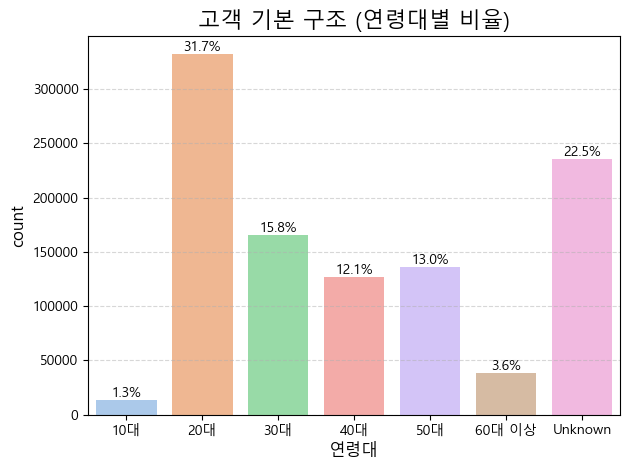

In [65]:
age_order = ['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']

age_cnt = df_fin['age_segment'].value_counts().reindex(age_order)
age_pct = (age_cnt / age_cnt.sum() * 100).round(1)

df_fin['age_segment'] = pd.Categorical(
    df_fin['age_segment'],
    categories=age_order,
    ordered=True
)

ax = sns.countplot(
    x='age_segment',
    data=df_fin,
    order=df_fin['age_segment'].cat.categories,
    hue='age_segment',
    palette='pastel',
    legend=False
)

# 막대 위에 비율 표시
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    if height > 0:
        pct = age_pct.iloc[i]
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{pct}%',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.title('고객 기본 구조 (연령대별 비율)', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


> 기존 `customers` 테이블에 존재하지 않고 `transactions` 테이블의 구매 내역만 존재하는 데이터를 `Unknown` 처리하여 시각화해본 결과 <br>
> 약 20% 이상의 비율을 가진 것으로 확인되었다

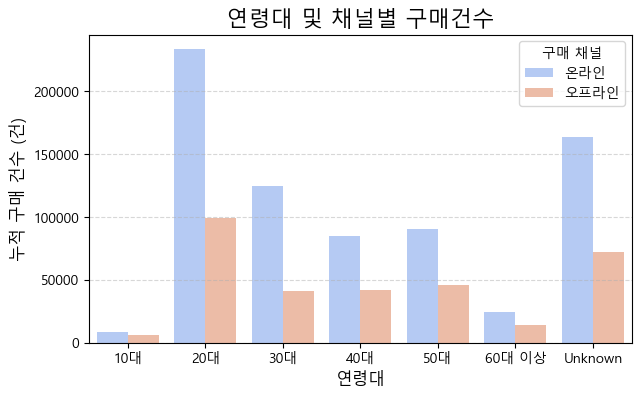

In [70]:
##연령대 및 채널별 구매건수
plt.figure(figsize=(7, 4))

sns.countplot(
    data=df_fin, 
    x='age_segment', 
    hue='channel', 
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown'],
    palette='coolwarm'
)

plt.title('연령대 및 채널별 구매건수', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('누적 구매 건수 (건)', fontsize=12)
plt.legend(title='구매 채널')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

> 모든 연령대에서 온라인 구매율이 높게 나왔으며, 20대의 구매력은 다른 연령대에 비해 매우 높음을 볼 수 있다.

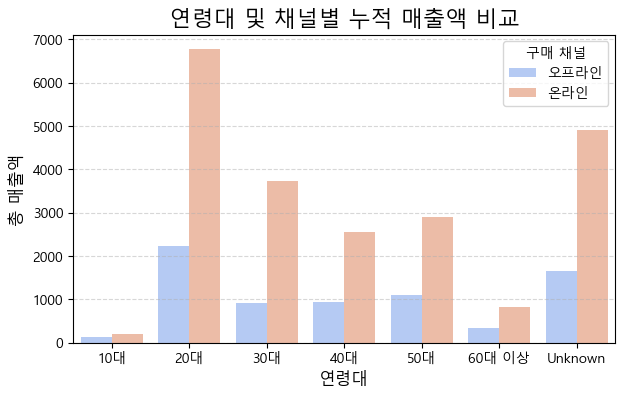

In [58]:
## 연령대 및 채널별 누적 매출액
df_sales = df_fin.groupby(['age_segment', 'channel'])['price'].sum().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(
    data=df_sales, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='coolwarm',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
)

plt.title('연령대 및 채널별 누적 매출액 비교', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='구매 채널')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

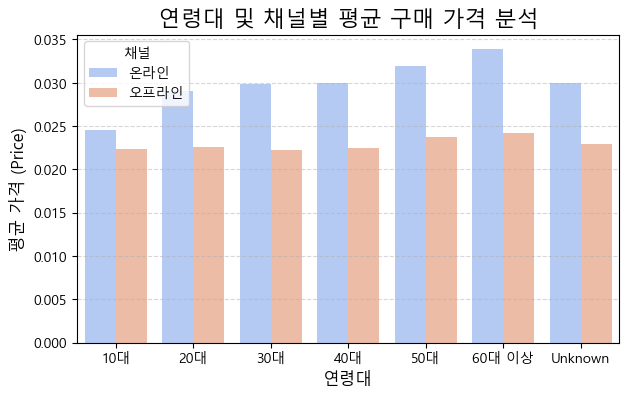

In [59]:
## 연령대 및 채널별 평균 구매 가격
plt.figure(figsize=(7, 4))

sns.barplot(
    data=df_fin, 
    x='age_segment', 
    y='price', 
    hue='channel',
    palette='coolwarm',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown'],
    errorbar=None
)

plt.title('연령대 및 채널별 평균 구매 가격 분석', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('평균 가격 (Price)', fontsize=12)
plt.legend(title='채널', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

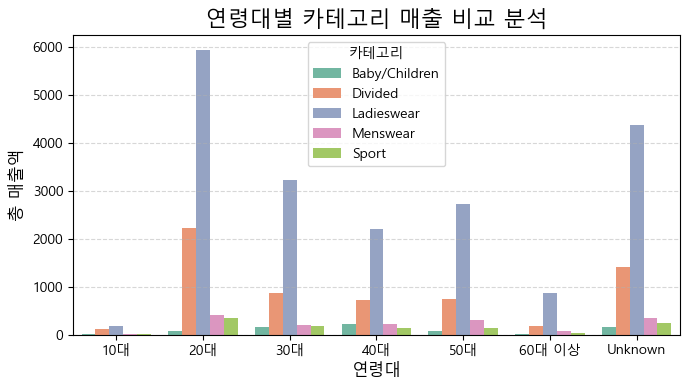

In [60]:
## 연령대별 카테고리 매출
df_category_sales = df_fin.groupby(['age_segment', 'index_group_name'])['price'].sum().reset_index()

plt.figure(figsize=(7, 4))
sns.barplot(
    data=df_category_sales,
    x='age_segment',
    y='price',
    hue='index_group_name',
    palette='Set2',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
)
plt.title('연령대별 카테고리 매출 비교 분석', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.legend(title='카테고리')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

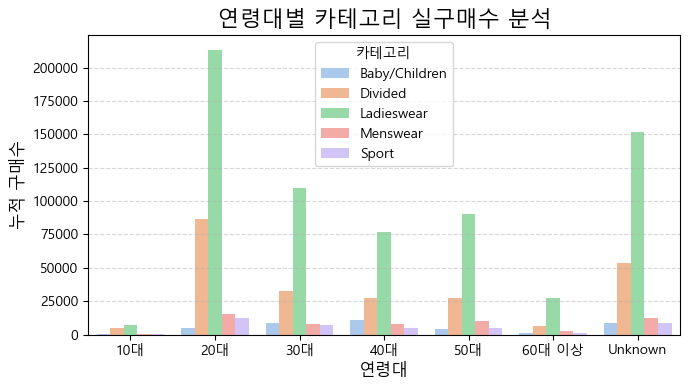

In [61]:
# 연령대별 카테고리 거래량
df_category_counts = df_fin.groupby(['age_segment', 'index_group_name']).size().reset_index(name='transaction_count')

plt.figure(figsize=(7, 4))
sns.barplot(
    data=df_category_counts,
    x='age_segment',
    y='transaction_count',
    hue='index_group_name',
    palette='pastel',
    order=['10대', '20대', '30대', '40대', '50대', '60대 이상', 'Unknown']
)
plt.title('연령대별 카테고리 실구매수 분석', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('누적 구매수', fontsize=12)
plt.legend(title='카테고리')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

> 모든 연령대에서 Ladieswear 카테고리의 구매가 가장 많이 이뤄졌으며, 그다음으로는 Divided 카테고리의 구매가 많음을 볼 수 있다.